# Case study

General guidelines and information
This is a business case - where your skills to evaluate a business problem will be evaluated. 	
However,we belive in utilizing new technology to solve old problems, your creativity and usage of tools will be given high weightage.	


## Part A:
Airline A is currently flying a large international network. Their flight operations are shown in the tab "Operations". Various aircraft characteristics are listed in tab "AC characteristics". They would like to know the following:		

1.What is the total cost by aircraft type for the year? (Suggested tools: Any of Python/SQL )	
			Note:	Total cost = Hours flown * Costs/hour
2.Which aircraft type  has the lowest cost per seat per km flown?	
				
				
## Part B:
Airline B is a startup airline and is considering flying on the city pairs as shown in tab "City Pairs". They would like to know:

1.Which aircraft types are best suited for their operation?  (Suggested tools: Any of Python/SQL)	
			
Note:This is an optimization between 3 factors: Range, Passenger demand, costs. Hence the aircraft which is capable of flying between 2 cities (range), has enough seats to meet the demand, and has the lowest cost will win.Please also note that the passenger demand is per day, hence an aircraft can make several trips between 2 cities to meet that demand.1 aircraft type will always be most suitable for a given city pair. Hence resultant fleet would be a mix of different aircraft types.

In case you are unable to get to the final solution, please lay out the step-by-step approach to be used.
								
Please prepare a short report with your recommendations on Part A and Part B. Report can be in any format (though interactive mediums are always preferred).

#### Project by Ebin Jose Mathew (ebin97@gmail.com)




# SOLUTION
Exploratory data analysis and interactive result can be found on my tableau public link:

https://public.tableau.com/views/aircraftdataset/costofaircraftoperations?:language=en-GB&:display_count=n&:origin=viz_share_link

Please note that direct links to specific part of the projects are given in this iPython Notebook.

## Importing libraries 

In [11]:
import pandas as pd
import numpy as np
#import altair as alt
#import datapane as dp
import math
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

## Loading the data
Because the tables were not loaded properly hence we made some changes

### Aircraft costs

In [12]:
df_ac = pd.read_excel("Data Science Case study Vindiata.xlsx", engine='openpyxl',sheet_name="AC characteristics")

In [13]:
df_ac  #Aircraft costs

,Aircraft Costs,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,A320,5000,800,150,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,A330,8000,900,250,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,B737,5000,800,150,5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,B747,10000,900,350,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Q400,1500,750,90,3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,ATR72,1000,650,75,2750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#all the tables were not loaded properly hence we made some changes
df_ac.drop(columns=['Aircraft Costs','Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
                    'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
                    'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
                    'Unnamed: 17', 'Unnamed: 18'
                   ],axis=1, inplace=True)

df_ac=df_ac.drop([df_ac.index[0], df_ac.index[1],df_ac.index[2]])

df_ac.coloumns=["Aircraft Type","Range (Km)","Ave. Speed (km/h)",
                "Number of Seats","Costs per flight hour"
               ]

df_ac=df_ac.set_axis(["Aircraft Type","Range (Km)","Ave. Speed (km/h)",
                      "Number of Seats","Costs per flight hour"
                     ], axis=1, inplace=False)

<ipython-input-14-17e071753120>:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_ac.coloumns=["Aircraft Type","Range (Km)","Ave. Speed (km/h)",


In [15]:
df_ac

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour
3,A320,5000,800,150,5000
4,A330,8000,900,250,7500
5,B737,5000,800,150,5100
6,B747,10000,900,350,12000
7,Q400,1500,750,90,3500
8,ATR72,1000,650,75,2750


### Aircraft operations 

In [16]:
df_op = pd.read_excel("Data Science Case study Vindiata.xlsx", engine='openpyxl',sheet_name="Operations")

In [17]:
df_op  #Aircraft operations 

,Airline A - hours flown,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,Hours flown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,NaN,NaN,NaN,NaN
2,NaN,Aircraft Name,Aircraft Type,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,NaN,NaN,NaN,NaN
3,NaN,A,A320,250,251,248,253,243,245,248,246,256,256,251,252,NaN,NaN,NaN,NaN
4,NaN,B,A330,300,301,298,303,293,295,298,296,306,306,301,302,NaN,NaN,NaN,NaN
5,NaN,C,B737,245,246,243,248,238,240,243,241,251,251,246,247,NaN,NaN,NaN,NaN
6,NaN,D,B747,310,311,308,313,303,305,308,306,316,316,311,312,NaN,NaN,NaN,NaN
7,NaN,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202,NaN,NaN,NaN,NaN
8,NaN,F,ATR72,195,196,193,198,188,190,193,191,201,201,196,197,NaN,NaN,NaN,NaN
9,NaN,G,B747,300,301,298,303,293,295,298,296,306,306,301,302,NaN,NaN,NaN,NaN


In [18]:
df_op.drop(columns=['Airline A - hours flown','Unnamed: 15', 'Unnamed: 16',
                    'Unnamed: 17', 'Unnamed: 18'
                   ],axis=1, inplace=True)

df_op=df_op.drop([df_op.index[0], df_op.index[1],df_op.index[2]])

df_op.coloumns=["Aircraft Name","Aircraft Type","2014-01-01", "2014-02-01" , "2014-03-01"
                ,"2014-04-01", "2014-05-01","2014-06-01", "2014-07-01","2014-08-01" 
                ,"2014-09-01","2014-10-01", "2014-11-01", "2014-12-01"
               ]

df_op=df_op.set_axis(['Aircraft Name','Aircraft Type','2014-01-01','2014-02-01','2014-03-01'
                      ,'2014-04-01','2014-05-01','2014-06-01','2014-07-01',
                      '2014-08-01','2014-09-01','2014-10-01','2014-11-01',
                      '2014-12-01'
                     ], axis=1, inplace=False)


<ipython-input-18-e6649e2d5594>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_op.coloumns=["Aircraft Name","Aircraft Type","2014-01-01", "2014-02-01" , "2014-03-01"


In [19]:
df_op

,Aircraft Name,Aircraft Type,2014-01-01,2014-02-01,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
3,A,A320,250,251,248,253,243,245,248,246,256,256,251,252
4,B,A330,300,301,298,303,293,295,298,296,306,306,301,302
5,C,B737,245,246,243,248,238,240,243,241,251,251,246,247
6,D,B747,310,311,308,313,303,305,308,306,316,316,311,312
7,E,Q400,200,201,198,203,193,195,198,196,206,206,201,202
8,F,ATR72,195,196,193,198,188,190,193,191,201,201,196,197
9,G,B747,300,301,298,303,293,295,298,296,306,306,301,302
10,H,Q400,195,196,193,198,188,190,193,191,201,201,196,197
11,I,ATR72,200,201,198,203,193,195,198,196,206,206,201,202
12,J,A330,310,311,308,313,303,305,308,306,316,316,311,312


### Ciy Pairs

In [20]:
df_cp = pd.read_excel("Data Science Case study Vindiata.xlsx", engine='openpyxl',sheet_name="City pairs")

In [21]:
df_cp #city pairs

,Airline B - City Pairs considered,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Origin City,Desitnation City,Pass. Demand \n(per day),Distance (km),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AA,BB,420,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,BB,CC,450,6500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,CC,AA,300,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,AA,DD,300,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_cp=df_cp.drop([df_cp.index[0], df_cp.index[1],df_cp.index[2]])

df_cp.drop(columns=['Airline B  - City Pairs considered','Unnamed: 5', 'Unnamed: 6', 
                    'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
                    'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'
                    ,'Unnamed: 17', 'Unnamed: 18'],axis=1, inplace=True)

df_cp=df_cp.set_axis(["Origin City","Desitnation City","Pass. Demand \n(per day)",
                      "Distance (km)"], axis=1, inplace=False)



In [23]:
df_cp

,Origin City,Desitnation City,Pass. Demand \n(per day),Distance (km)
3,AA,BB,420,3000
4,BB,CC,450,6500
5,CC,AA,300,400
6,AA,DD,300,1000


## EXPLORATORY DATA ANALYSIS

Please use the following tableau public links to view EDA for aircraft information and Rotue Seat Information
 
https://public.tableau.com/views/aircraftdataset/Aircraftinformation?:language=en-GB&:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/aircraftdataset/routeseatinformation?:language=en-GB&:display_count=n&:origin=viz_share_link

### CITY ROUTES

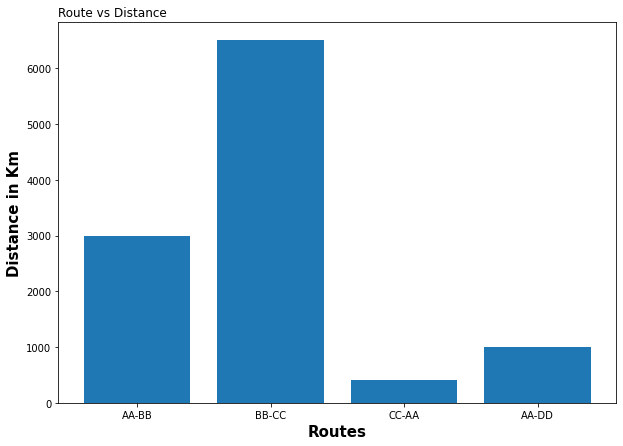

In [24]:
city_list=["AA-BB","BB-CC","CC-AA","AA-DD"]
City = city_list
Distance = df_cp["Distance (km)"]
fig = plt.figure(figsize =(10, 7))
plt.bar(City, Distance)
plt.title('Route vs Distance',
             loc ='left', )
plt.xlabel('Routes', fontweight ='bold', fontsize = 15)
plt.ylabel('Distance in Km', fontweight ='bold', fontsize = 15)

plt.show()

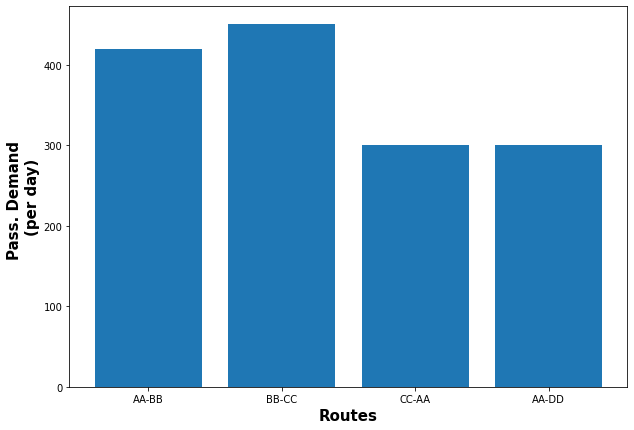

In [25]:
city_list=["AA-BB","BB-CC","CC-AA","AA-DD"]
City = city_list
Distance = df_cp["Pass. Demand \n(per day)"]
fig = plt.figure(figsize =(10, 7))
plt.bar(City, Distance)

plt.xlabel('Routes', fontweight ='bold', fontsize = 15)
plt.ylabel('Pass. Demand \n(per day)', fontweight ='bold', fontsize = 15)
plt.show()

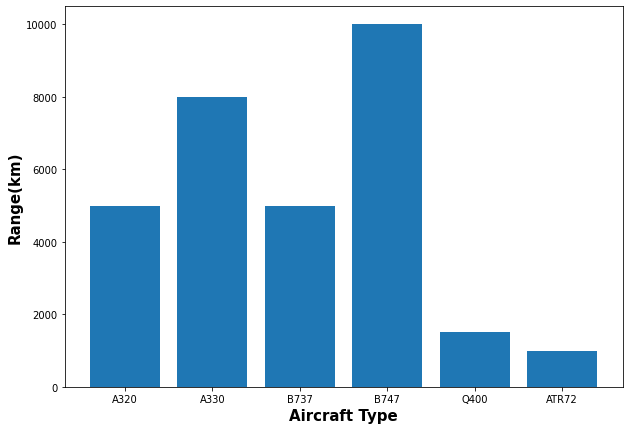

In [26]:

City =  df_ac["Aircraft Type"]
Distance = df_ac["Range (Km)"]
fig = plt.figure(figsize =(10, 7))
plt.bar(City, Distance)

plt.xlabel('Aircraft Type', fontweight ='bold', fontsize = 15)
plt.ylabel('Range(km)', fontweight ='bold', fontsize = 15)
plt.show()

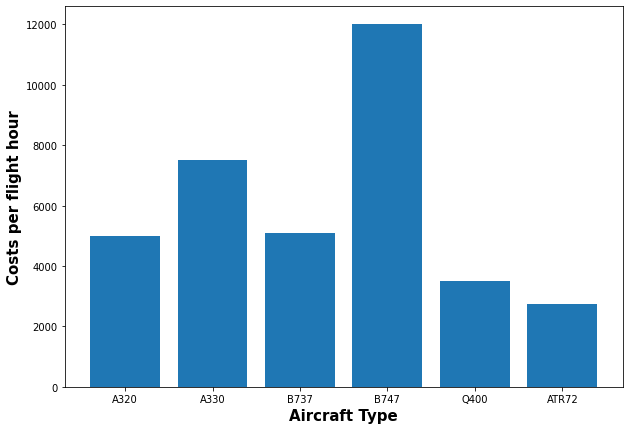

In [27]:
City =  df_ac["Aircraft Type"]
Distance = df_ac["Costs per flight hour"]
fig = plt.figure(figsize =(10, 7))
plt.bar(City, Distance)

plt.xlabel('Aircraft Type', fontweight ='bold', fontsize = 15)
plt.ylabel('Costs per flight hour', fontweight ='bold', fontsize = 15)
plt.show()

saving the files into excel files 

In [28]:
writer=pd.ExcelWriter("Aircraftcosts.xlsx")
df_ac.to_excel(writer)
writer.save()

In [29]:
writer=pd.ExcelWriter("Aircraftoperations.xlsx")
df_op.to_excel(writer)
writer.save()

In [30]:
writer=pd.ExcelWriter("citypairs.xlsx")
df_cp.to_excel(writer)
writer.save()

## PART A

In [32]:
date_hours=['2014-01-01',
 '2014-02-01',
 '2014-03-01',
 '2014-04-01',
 '2014-05-01',
 '2014-06-01',
 '2014-07-01',
 '2014-08-01',
 '2014-09-01',
 '2014-10-01',
 '2014-11-01',
 '2014-12-01']

df_op["Total_year_hours"]=df_op[date_hours].sum(axis=1)
df_aircraft= df_ac.merge(df_op, on="Aircraft Type", how = 'inner')

#Total cost  = cost per hour * total hours 
df_aircraft["Total cost"]=df_aircraft["Costs per flight hour"]*df_aircraft["Total_year_hours"]

#total distance travelled =avg speed * toal hours 
df_aircraft["total distance"]=df_aircraft["Ave. Speed (km/h)"]*df_aircraft["Total_year_hours"]

#cost per km =total cost /total distance
df_aircraft["cost per km"]=df_aircraft["Total cost"]/df_aircraft["total distance"]

#cost per seat per km= cost per km/total number of seats
df_aircraft["Cost per seat per km"]=df_aircraft["cost per km"]/df_aircraft["Number of Seats"]

In [33]:
df_aircraft

,Aircraft Type,Range (Km),Ave. Speed (km/h),Number of Seats,Costs per flight hour,Aircraft Name,2014-01-01,2014-02-01,2014-03-01,2014-04-01,...,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01,Total_year_hours,Total cost,total distance,cost per km,Cost per seat per km
0,A320,5000,800,150,5000,A,250,251,248,253,...,246,256,256,251,252,2999.0,14995000.0,2399200.0,6.25,0.041667
1,A320,5000,800,150,5000,L,245,246,243,248,...,241,251,251,246,247,2939.0,14695000.0,2351200.0,6.25,0.041667
2,A320,5000,800,150,5000,O,250,251,248,253,...,246,256,256,251,252,2999.0,14995000.0,2399200.0,6.25,0.041667
3,A320,5000,800,150,5000,P,245,246,243,248,...,241,251,251,246,247,2939.0,14695000.0,2351200.0,6.25,0.041667
4,A320,5000,800,150,5000,X,250,251,248,253,...,246,256,256,251,252,2999.0,14995000.0,2399200.0,6.25,0.041667
5,A330,8000,900,250,7500,B,300,301,298,303,...,296,306,306,301,302,3599.0,26992500.0,3239100.0,8.333333,0.033333
6,A330,8000,900,250,7500,J,310,311,308,313,...,306,316,316,311,312,3719.0,27892500.0,3347100.0,8.333333,0.033333
7,A330,8000,900,250,7500,M,300,301,298,303,...,296,306,306,301,302,3599.0,26992500.0,3239100.0,8.333333,0.033333
8,A330,8000,900,250,7500,S,310,311,308,313,...,306,316,316,311,312,3719.0,27892500.0,3347100.0,8.333333,0.033333
9,A330,8000,900,250,7500,T,300,301,298,303,...,296,306,306,301,302,3599.0,26992500.0,3239100.0,8.333333,0.033333


#### Solutions for PART A

Q1.What is the total cost by aircraft type for the year?

Ans: coloumn total cost in df_aircraft


Q2.Which aircraft type  has the lowest cost per seat per km flown?

Ans. column Cost per seat per km shows that Aircraft A330 has the lowest cost per seat per km as average 0.03333 all cost related values are in US dollars. 

Follow this link to view cost of aircraft operations:
https://public.tableau.com/views/aircraftdataset/costofaircraftoperations?:language=en-GB&:display_count=n&:origin=viz_share_link

In [34]:
writer=pd.ExcelWriter("PartA.xlsx")
df_aircraft.to_excel(writer)
writer.save()

## PART B

In [203]:
df_cp

,Origin City,Desitnation City,Pass. Demand \n(per day),Distance (km)
3,AA,BB,420,3000
4,BB,CC,450,6500
5,CC,AA,300,400
6,AA,DD,300,1000


In [36]:
#for trip between AA to BB

df_AA_BB=pd.DataFrame()
df_AA_BB["Aircraft Type"]=df_ac["Aircraft Type"]

#number of trips = demand no of passenger/ number of seats on the plane 
df_AA_BB["Number of trips"]=420/df_ac["Number of Seats"]

#due to lack of information we will drop Q400 and ATR72
df_AA_BB=df_AA_BB.drop([df_AA_BB.index[4], df_AA_BB.index[5]])

#rounding the trips to the next whole number 
df_AA_BB["Number of trips"]=df_AA_BB["Number of trips"].apply(np.ceil)


#cost per trip = distance per trip * cost per km
df_AA_BB["Total cost per trip"]=  [3000*6.25,3000*8.3,3000*6.3,3000*13.3]

#Total cost in a day=number of trips *total cost per trip
df_AA_BB["Total cost per day"]=df_AA_BB["Number of trips"]*df_AA_BB["Total cost per trip"]


In [37]:
df_AA_BB

,Aircraft Type,Number of trips,Total cost per trip,Total cost per day
3,A320,3,18750.0,56250.0
4,A330,2,24900.0,49800.0
5,B737,3,18900.0,56700.0
6,B747,2,39900.0,79800.0


In [38]:
#for trip between AA to BB
writer=pd.ExcelWriter("AA_BB.xlsx")
df_AA_BB.to_excel(writer)
writer.save()

Hence by analyzing the opatined data it can be concluded that Aircraft (model=A330)is the most efficent between the route city AA and city BB

In [40]:
#for trip between BB to CC
df_BB_CC=pd.DataFrame()
df_BB_CC["Aircraft Type"]=df_ac["Aircraft Type"]
df_BB_CC["Number of trips"]=450/df_ac["Number of Seats"]
df_BB_CC=df_BB_CC.drop([df_BB_CC.index[4], df_BB_CC.index[5]])
df_BB_CC["Number of trips"]=df_BB_CC["Number of trips"].apply(np.ceil)
df_BB_CC["Total cost per trip"]=  [6500*6.25,6500*8.3,6500*6.3,6500*13.3]
df_BB_CC["Total cost per day"]=df_BB_CC["Number of trips"]*df_BB_CC["Total cost per trip"]


In [41]:
df_BB_CC

,Aircraft Type,Number of trips,Total cost per trip,Total cost per day
3,A320,3,40625.0,121875.0
4,A330,2,53950.0,107900.0
5,B737,3,40950.0,122850.0
6,B747,2,86450.0,172900.0


In [42]:
#for trip between BB to CC
writer=pd.ExcelWriter("BB_CC.xlsx")
df_BB_CC.to_excel(writer)
writer.save()

Hence by analyzing the opatined data it can be concluded that Aircraft (model=A330)is the most efficent between the route city BB and city CC

In [44]:
#for trip between CC to AA
df_CC_AA=pd.DataFrame()
df_CC_AA["Aircraft Type"]=df_ac["Aircraft Type"]
df_CC_AA["Number of trips"]=300/df_ac["Number of Seats"]
df_CC_AA=df_CC_AA.drop([df_CC_AA.index[4], df_CC_AA.index[5]])
df_CC_AA["Number of trips"]=df_CC_AA["Number of trips"].apply(np.ceil)
df_CC_AA["Total cost per trip"]=  [400*6.25,400*8.3,400*6.3,400*13.3]
df_CC_AA["Total cost per day"]=df_CC_AA["Number of trips"]*df_CC_AA["Total cost per trip"]

In [45]:
df_CC_AA

,Aircraft Type,Number of trips,Total cost per trip,Total cost per day
3,A320,2,2500.0,5000.0
4,A330,2,3320.0,6640.0
5,B737,2,2520.0,5040.0
6,B747,1,5320.0,5320.0


In [46]:
#for trip between CC to AA
writer=pd.ExcelWriter("CC_AA.xlsx")
df_CC_AA.to_excel(writer)
writer.save()

Hence by analyzing the opatined data it can be concluded that Aircraft (model=A320)is the most efficent between the route city CC and city AA

In [47]:
#for trip AA to DD
df_AA_DD=pd.DataFrame()
df_AA_DD["Aircraft Type"]=df_ac["Aircraft Type"]
df_AA_DD["Number of trips"]=300/df_ac["Number of Seats"]
df_AA_DD=df_AA_DD.drop([df_AA_DD.index[4], df_AA_DD.index[5]])
df_AA_DD["Number of trips"]=df_AA_DD["Number of trips"].apply(np.ceil)
df_AA_DD["Total cost per trip"]=  [1000*6.25,1000*8.3,1000*6.3,1000*13.3]
df_AA_DD["Total cost per day"]=df_AA_DD["Number of trips"]*df_AA_DD["Total cost per trip"]

In [48]:
df_AA_DD

,Aircraft Type,Number of trips,Total cost per trip,Total cost per day
3,A320,2,6250.0,12500.0
4,A330,2,8300.0,16600.0
5,B737,2,6300.0,12600.0
6,B747,1,13300.0,13300.0


In [49]:
#for trip between AA to DD
writer=pd.ExcelWriter("AA_DD.xlsx")
df_AA_DD.to_excel(writer)
writer.save()

Hence by analyzing the opatined data it can be concluded that Aircraft (model=A320) is the most efficent between the route city AA and city DD

#### Solutions for PART B

Please use the following link to view the results in Tableau:
https://public.tableau.com/views/aircraftdataset/costperroute?:language=en-GB&:display_count=n&:origin=viz_share_link

1. city AA and city BB: (model=A330)
2. city BB and city CC: (model=A330)
3. city CC and city AA :(model=A320)
4. city AA and city DD :(model=A320)

In [ ]:
writer=pd.ExcelWriter("PartA.xlsx")
df_aircraft.to_excel(writer)
writer.save()

Exploratory data analysis and interactive result can be found on my tableau public link:
(note:for interactive data analysis click on fields on dashboard:

1.aircraft information

2.cost of aircraft operation

3.cost per route

https://public.tableau.com/views/aircraftdataset/costofaircraftoperations?:language=en-GB&:display_count=n&:origin=viz_share_link